## Observations and Insights

## Dependencies and starter code

In [1]:
#OBSERVATIONS:
#1. Maximum number of data points have been recorded for the Drug regimen Capomulin.
#2. Study was conducted on a greater percentage of male mice than female mice.
#3. There is strong positive correlation between the mouse weight and average tumor volume for Capomulin drug regimen
#4. There are no outliers for Capomulin, Ramicane and Ceftamin drug regimen for final tumor volume of each mouse Id 
#   and only one outlier in case of Infubinol, this can be seen both quantitatively and also by box and whisker plot  


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [3]:
mouse_metadata.head()
#len(mouse_metadata)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()
#len(study_results)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
Pharmaceuticals_df=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="outer")
Pharmaceuticals_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [6]:
#Calculating length of the DataFrame
len(Pharmaceuticals_df)

1893

## Summary statistics

In [7]:
#Grouping the merged dataframe by Drug Regimen  
Pharma_group=Pharmaceuticals_df.groupby(["Drug Regimen"])


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Statistics=pd.DataFrame({"Mean":Pharma_group["Tumor Volume (mm3)"].mean().map("{:.2f}".format),"Median":Pharma_group["Tumor Volume (mm3)"].median().map("{:.2f}".format),"Variance":Pharma_group["Tumor Volume (mm3)"].var().map("{:.2f}".format),"Standard Deviation":Pharma_group["Tumor Volume (mm3)"].std().map("{:.2f}".format),"SEM":Pharma_group["Tumor Volume (mm3)"].sem().map("{:.2f}".format)})
Summary_Statistics  

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

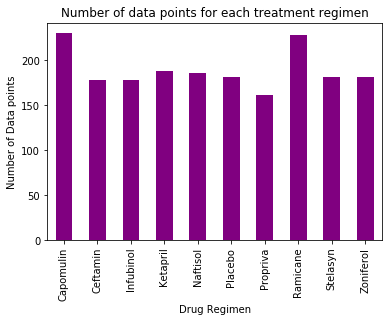

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Calculating the data points for each drug regimen
data_points=Pharma_group["Mouse ID"].count()
data_points

#Bar plot showing number of data points for each treatment regimen
data_points_chart=data_points.plot(kind="bar",color="purple",title="Number of data points for each treatment regimen")
data_points_chart.set_xlabel("Drug Regimen")
data_points_chart.set_ylabel("Number of Data points")
plt.show()

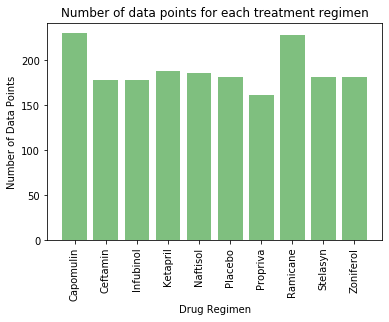

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Storing the number of data points in a dataframe 
df_pyplot=pd.DataFrame({"Count":Pharma_group["Mouse ID"].count()})

#Generating a bar plot between the number of data points for each treatment
x_labels=df_pyplot.index
y_axis=df_pyplot["Count"]
plt.bar(x_labels,y_axis,color="green",alpha=0.5)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of data points for each treatment regimen")
plt.show()

## Pie plots

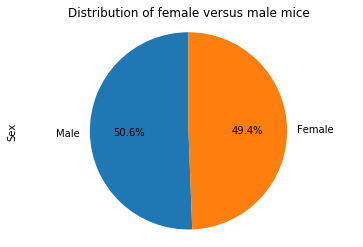

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=Pharmaceuticals_df["Sex"].value_counts()
gender
gender.plot(kind="pie",autopct="%1.1f%%",title="Distribution of female versus male mice",startangle=90)
plt.axis("equal")
plt.show()

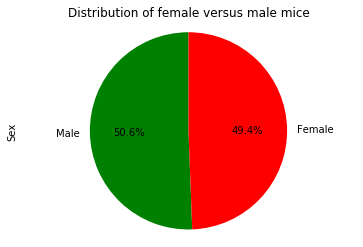

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender1=pd.DataFrame({"Count":Pharmaceuticals_df["Sex"].value_counts()})
labels=gender1.index
colors=["green","red"]
plt.pie(gender1["Count"],labels=labels,colors=colors,autopct="%1.1f%%",startangle=90)
plt.ylabel("Sex")
plt.title("Distribution of female versus male mice")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
#Creating a dataframe containing data for only Capomulin drug
Capomulin_df=Pharmaceuticals_df.loc[Pharmaceuticals_df["Drug Regimen"]=="Capomulin",:]

#Grouping Capomulin dataframe by Mouse ID to extract the max timepoint and further use it in extracting the final
#tumor volume for each mouse being treated by the drug capomulin
Capomulin_group=Capomulin_df.groupby(["Mouse ID"])
timespoint_max=Capomulin_group["Timepoint"].max()
timespoint_max
list_times_index=timespoint_max.index
vol=[]
for i in range(len(timespoint_max)):
    vol.append(float(Capomulin_df[(Capomulin_df["Mouse ID"]==list_times_index[i])&(Capomulin_df["Timepoint"]==timespoint_max[i])]["Tumor Volume (mm3)"]))
vol  
 
# Calculating the quartiles ,IQR and outliers quantitaively using the final tumor volume extracted for Capomulin drug
vol_capomulin_df=pd.DataFrame({"Final Tumor Volume":vol})
vol_capomulin=vol_capomulin_df["Final Tumor Volume"]
vol_capomulin
quartiles1=vol_capomulin.quantile([0.25,0.5,0.75])
lower_quartile1=quartiles1[0.25]
upper_quartile1=quartiles1[0.75]
iqr1=upper_quartile1-lower_quartile1
print("The upper quartile, lower quartile, median and IQR of the final tumor volume for Capomulin Regimen is:")
print(f"Lower quartile: {round(lower_quartile1,4)}")
print(f"Upper quartile: {round(upper_quartile1,4)}")
print(f"IQR: {round(iqr1,4)}")
print(f"Median: {round(quartiles1[0.5],4)}")
lower_bound1 = lower_quartile1 - (1.5*iqr1)
upper_bound1= upper_quartile1 + (1.5*iqr1)

outliers1=[]
for value in vol: 
    if(value<lower_bound1)| (value>upper_bound1):
        outliers1.append(round(value,4))

print(f"Tumor volume less than {round(lower_bound1,4)} and greater than {round(upper_bound1,4)} are the potential outliers.")
print(f"Number of Outliers: {len(outliers1)}")
if len(outliers1)>0:
    print(f"Outliers are: {outliers1}")
elif len(outliers1)==0:
    print("No outliers.")
        

The upper quartile, lower quartile, median and IQR of the final tumor volume for Capomulin Regimen is:
Lower quartile: 32.3774
Upper quartile: 40.1592
IQR: 7.7819
Median: 38.1252
Tumor volume less than 20.7046 and greater than 51.832 are the potential outliers.
Number of Outliers: 0
No outliers.


In [17]:
#Creating a dataframe containing data for only Ramicane drug

Ramicane_df=Pharmaceuticals_df.loc[Pharmaceuticals_df["Drug Regimen"]=="Ramicane",:]

#Grouping Ramicane dataframe by Mouse ID to extract the max timepoint and further use it in extracting the final
#tumor volume for each mouse being treated by the drug Ramicane
Ramicane_group=Ramicane_df.groupby(["Mouse ID"])
timespoint_max2=Ramicane_group["Timepoint"].max()
timespoint_max2
list_times_index2=timespoint_max2.index
vol2=[]
for i in range(len(timespoint_max2)):
    vol2.append(float(Ramicane_df[(Ramicane_df["Mouse ID"]==list_times_index2[i])&(Ramicane_df["Timepoint"]==timespoint_max2[i])]["Tumor Volume (mm3)"]))
vol2 

# Calculating the quartiles ,IQR and outliers quantitaively using the final tumor volume extracted for Ramicane drug
vol_ramicane_df=pd.DataFrame({"Final Tumor Volume":vol2})
vol_ramicane=vol_ramicane_df["Final Tumor Volume"]
vol_ramicane
quartiles2=vol_ramicane.quantile([0.25,0.5,0.75])
lower_quartile2=quartiles2[0.25]
upper_quartile2=quartiles2[0.75]
iqr2=upper_quartile2-lower_quartile2
print("The upper quartile, lower quartile, median and IQR of the final tumor volume for Ramicane Regimen is:")
print(f"Lower quartile: {round(lower_quartile2,4)}")
print(f"Upper quartile: {round(upper_quartile2,4)}")
print(f"IQR: {round(iqr2,4)}")
print(f"Median: {round(quartiles2[0.5],4)}")
lower_bound2 = lower_quartile2 - (1.5*iqr2)
upper_bound2 = upper_quartile2 + (1.5*iqr2)

outliers2=[]
for value in vol2: 
    if(value<lower_bound2)| (value>upper_bound2):
        outliers2.append(round(value,4))

print(f"Tumor volume less than {round(lower_bound2,4)} and greater than {round(upper_bound2,4)} are the potential outliers.")
print(f"Number of Outliers: {len(outliers2)}")
if len(outliers2)>0:
    print(f"Outliers are: {outliers2}")
elif len(outliers2)==0:
    print("No outliers.")


The upper quartile, lower quartile, median and IQR of the final tumor volume for Ramicane Regimen is:
Lower quartile: 31.5605
Upper quartile: 40.659
IQR: 9.0985
Median: 36.5617
Tumor volume less than 17.9127 and greater than 54.3068 are the potential outliers.
Number of Outliers: 0
No outliers.


In [18]:
#Creating a dataframe containing data for only Infubinol drug
Infubinol_df=Pharmaceuticals_df.loc[Pharmaceuticals_df["Drug Regimen"]=="Infubinol",:]

#Grouping Infubinol dataframe by Mouse ID to extract the max timepoint and further use it in extracting the final
#tumor volume for each mouse being treated by the drug Infubinol
Infubinol_group=Infubinol_df.groupby(["Mouse ID"])
timespoint_max1=Infubinol_group["Timepoint"].max()
timespoint_max1
list_times_index1=timespoint_max1.index
vol1=[]
for i in range(len(timespoint_max1)):
    vol1.append(float(Infubinol_df[(Infubinol_df["Mouse ID"]==list_times_index1[i])&(Infubinol_df["Timepoint"]==timespoint_max1[i])]["Tumor Volume (mm3)"]))
vol1  
 
# Calculating the quartiles ,IQR and outliers quantitaively using the final tumor volume extracted for Infubinol drug
vol_Infubinol_df=pd.DataFrame({"Final Tumor Volume":vol1})
vol_Infubinol=vol_Infubinol_df["Final Tumor Volume"]
vol_Infubinol
quartiles3=vol_Infubinol.quantile([0.25,0.5,0.75])
lower_quartile3=quartiles3[0.25]
upper_quartile3=quartiles3[0.75]
iqr3=upper_quartile3-lower_quartile3
print("The upper quartile, lower quartile, median and IQR of the final tumor volume for Infubinol Regimen is:")
print(f"Lower quartile: {round(lower_quartile3,4)}")
print(f"Upper quartile: {round(upper_quartile3,4)}")
print(f"IQR: {round(iqr3,4)}")
print(f"Median: {round(quartiles3[0.5],4)}")
lower_bound3 = lower_quartile3 - (1.5*iqr3)
upper_bound3 = upper_quartile3 + (1.5*iqr3)

outliers3=[]
for value in vol1: 
    if(value<lower_bound3)| (value>upper_bound3):
        outliers3.append(round(value,4))

print(f"Tumor volume less than {round(lower_bound3,4)} and greater than {round(upper_bound3,4)} are the potential outliers.")
print(f"Number of Outliers: {len(outliers3)}")
if len(outliers3)>0:
    print(f"Outliers are: {outliers3}")
elif len(outliers3)==0:
    print("No outliers.")    

The upper quartile, lower quartile, median and IQR of the final tumor volume for Infubinol Regimen is:
Lower quartile: 54.0486
Upper quartile: 65.5257
IQR: 11.4771
Median: 60.1652
Tumor volume less than 36.8329 and greater than 82.7414 are the potential outliers.
Number of Outliers: 1
Outliers are: [36.3213]


In [19]:
#Creating a dataframe containing data for only Ceftamin drug
Ceftamin_df=Pharmaceuticals_df.loc[Pharmaceuticals_df["Drug Regimen"]=="Ceftamin",:]

#Grouping Ceftamin dataframe by Mouse ID to extract the max timepoint and further use it in extracting the final
#tumor volume for each mouse being treated by the drug Ceftamin
Ceftamin_group=Ceftamin_df.groupby(["Mouse ID"])
timespoint_max3=Ceftamin_group["Timepoint"].max()
timespoint_max3
list_times_index3=timespoint_max3.index
vol3=[]
for i in range(len(timespoint_max3)):
    vol3.append(float(Ceftamin_df[(Ceftamin_df["Mouse ID"]==list_times_index3[i])&(Ceftamin_df["Timepoint"]==timespoint_max3[i])]["Tumor Volume (mm3)"]))
vol3  
 
# Calculating the quartiles ,IQR and outliers quantitaively using the final tumor volume extracted for Ceftamin drug
vol_Ceftamin_df=pd.DataFrame({"Final Tumor Volume":vol3})
vol_Ceftamin=vol_Ceftamin_df["Final Tumor Volume"]
vol_Ceftamin
quartiles4=vol_Ceftamin.quantile([0.25,0.5,0.75])
lower_quartile4=quartiles4[0.25]
upper_quartile4=quartiles4[0.75]
iqr4=upper_quartile4-lower_quartile4
print("The upper quartile, lower quartile, median and IQR of the final tumor volume for Ceftamin Regimen is:")
print(f"Lower quartile: {round(lower_quartile4,4)}")
print(f"Upper quartile: {round(upper_quartile4,4)}")
print(f"IQR: {round(iqr4,4)}")
print(f"Median: {round(quartiles4[0.5],4)}")
lower_bound4 = lower_quartile4 - (1.5*iqr4)
upper_bound4 = upper_quartile4 + (1.5*iqr4)

outliers4=[]
for value in vol3: 
    if(value<lower_bound4)| (value>upper_bound4):
        outliers4.append(round(value,4))

print(f"Tumor volume less than {round(lower_bound4,4)} and greater than {round(upper_bound4,4)} are the potential outliers.")
print(f"Number of Outliers: {len(outliers4)}")
if len(outliers4)>0:
    print(f"Outliers are: {outliers4}")
elif len(outliers4)==0:
    print("No outliers.")


The upper quartile, lower quartile, median and IQR of the final tumor volume for Ceftamin Regimen is:
Lower quartile: 48.7221
Upper quartile: 64.2998
IQR: 15.5778
Median: 59.852
Tumor volume less than 25.3554 and greater than 87.6665 are the potential outliers.
Number of Outliers: 0
No outliers.


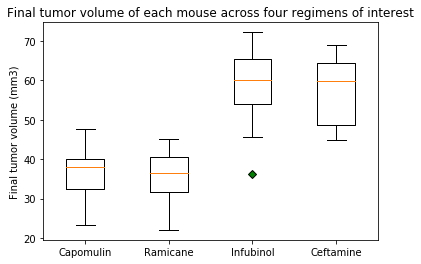

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Volume=[vol_capomulin,vol_ramicane,vol_Infubinol,vol_Ceftamin]
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each mouse across four regimens of interest')
ax1.set_ylabel('Final tumor volume (mm3)')
ax1.boxplot(Volume, flierprops=green_diamond)
ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamine"])
plt.show()

## Line and scatter plots

Enter the Id of the mouse for which you want to view the time plot treated with Capomulin b128


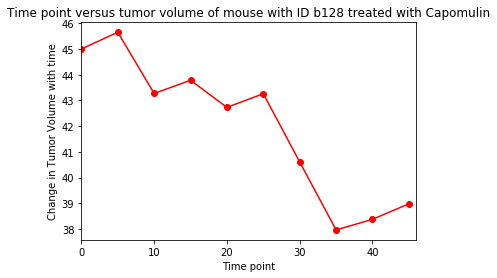

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


#Collecting the Mouse ID in form of list using the Capomulin dataframe created previously
list_to_check=Capomulin_df["Mouse ID"].tolist()

#Asking the user for Mouse ID
mouse_id=input("Enter the Id of the mouse for which you want to view the time plot treated with Capomulin ")

#Plotting the time point vs tumor volume for the Mouse ID entered (also checking if the mouse id entered by user has actually been 
#treated by Capomulin drug)
if(mouse_id in list_to_check):
    time_plot_df=Capomulin_df.loc[Capomulin_df["Mouse ID"]==mouse_id,:]
    x_axis=time_plot_df["Timepoint"]
    y_axis=time_plot_df["Tumor Volume (mm3)"]
    plt.plot(x_axis,y_axis,color="red",marker="o")
    plt.xlabel("Time point")
    plt.ylabel("Change in Tumor Volume with time")
    plt.xlim(0,46)
    plt.title("Time point versus tumor volume of mouse with ID "+mouse_id+" treated with Capomulin")
    plt.show()
elif(mouse_id  not in list_to_check):
    print("Mouse ID entered has not been treated by Capomulin")

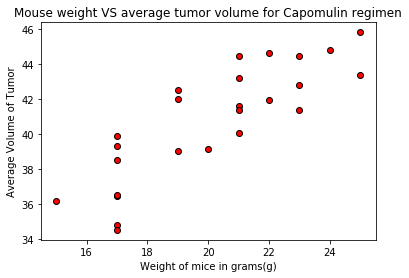

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Using the Capomulin dataframe grouped by Mouse ID(created previously) to calculate average tumor volume
Average_volume=pd.DataFrame({"Average Tumor Volume":Capomulin_group["Tumor Volume (mm3)"].mean(),"Weight (g)":Capomulin_group["Weight (g)"].mean()})
plt.scatter(Average_volume["Weight (g)"],Average_volume["Average Tumor Volume"],facecolor="r",edgecolor="black")
plt.xlabel("Weight of mice in grams(g)")
plt.ylabel("Average Volume of Tumor")
plt.title("Mouse weight VS average tumor volume for Capomulin regimen")
plt.show()

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen: 0.84


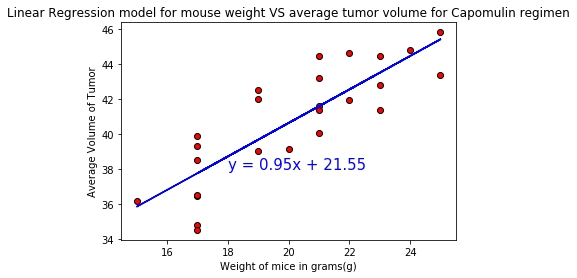

In [23]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

corr=st.pearsonr(Average_volume["Weight (g)"],Average_volume["Average Tumor Volume"])
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen: {round(corr[0],2)}")
x_values = Average_volume["Weight (g)"]
y_values = Average_volume["Average Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolor="r",edgecolor="black")
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(18,38),fontsize=15,color="b")
plt.xlabel("Weight of mice in grams(g)")
plt.ylabel("Average Volume of Tumor")
plt.title("Linear Regression model for mouse weight VS average tumor volume for Capomulin regimen")
plt.show()

